In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

## columns 설명

- DBNOs - 노크한 적 플레이어 수.
- assists - 이 플레이어가 피해를 입힌 적 중 동료에게 살해된 플레이어 수.
- boosts - 사용된 부스트 항목 수입니다.
- damageDealt - 총 데미지가 처리되었습니다. 참고: 자해 피해를 뺍니다.
- headshotKills - 헤드샷으로 죽인 적 플레이어의 수.
- heles - 사용된 치료 항목 수입니다.
- ID - 플레이어 ID
- killPlace - 죽은 적 플레이어의 수에 따라 순위를 매깁니다.
- killPoints - 플레이어의 외부 랭킹을 기반으로 합니다. (이는 물질만 죽이는 엘로 랭킹이라고 생각하십시오.) 랭크 포인트에 -1 이외의 값이 있는 경우 kill Points의 0은 "없음"으로 처리되어야 합니다.
- killStreaks - 짧은 시간 동안 죽은 최대 적 플레이어 수입니다.
- kills - 죽은 적 플레이어의 수.
- longestKill - 사망 시 사망하는 플레이어와 플레이어의 최장 거리입니다. 플레이어를 쓰러뜨리고 차를 몰고 도망가면 가장 긴 Kill stat가 발생할 수 있기 때문에 오해의 소지가 있을 수 있습니다.
- matchDuration - 일치 기간(초)입니다.
- matchId - 일치하는 항목을 식별하는 ID입니다. 훈련 세트와 테스트 세트 모두에 있는 경기가 없습니다.
- matchType: 데이터의 원본 게임 모드를 식별하는 문자열입니다. 표준 모드는 "solo", "duo", "squad", "solo-fpp", "duo-fpp", "squad-fpp"이다.
- rankPoints - Elo(자기 실력을 점수로 나타내주는 시스템이) 와 같은 플레이어의 랭킹. 이 순위는 일관성이 없으며 API의 다음 버전에서 더 이상 사용되지 않으므로 주의하여 사용하십시오. -1 값은 "없음"으로 바뀝니다.
- revives - 이 플레이어가 팀원을 부활시킨 횟수.
- rideDistance - 미터 단위로 측정한 차량의 총 주행 거리.
- roadKills - 차량 내에서의 사망 횟수입니다.
- swim Distance - 미터 단위로 측정한 수영의 총 주행 거리.
- teamKills - 이 플레이어가 팀원을 죽인 횟수입니다.
- vehicleDestroys - 파괴된 차량 수입니다.
- walkDistance - 미터 단위로 측정한 도보로 이동한 총 거리.
- waeponsAcquired - 주운 무기 수입니다.
- winPoints - 승점 기반 선수의 외부 순위. (승점만 중요한 엘로 순위라고 생각하시면 됩니다.) 순위 Points에 -1 이외의 값이 있으면 winPoints의 모든 0을 "없음"으로 처리해야 합니다.
- groupId - 일치 항목 내에서 그룹을 식별하는 ID입니다. 같은 조의 선수들이 다른 경기에서 경기할 경우, 그들은 매번 다른 조의 아이디를 갖게 된다.
- numGroups - 일치 항목에 대한 데이터가 있는 그룹 수입니다.
- maxPlace - 매치에서 데이터가 있는 최악의 위치입니다. 데이터가 배치를 건너뛰기 때문에 이 값은 numGroups와 일치하지 않을 수 있습니다.
- winPlacePerc - 예측 대상입니다. 1위는 1위, 0위는 경기 꼴찌에 해당하는 백분위수 승부처다. 이 값은 numGroups가 아닌 maxPlace에서 계산되므로 일치에 누락된 청크가 있을 수 있습니다.

In [3]:
print('testtesttest!')

testtesttest!


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/이어드림스쿨/Today_I_learn/6월/pubg-finish-placement-prediction/train_V2.csv')
test = pd.read_csv('/content/drive/MyDrive/이어드림스쿨/Today_I_learn/6월/pubg-finish-placement-prediction/test_V2.csv')
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [ ]:
test.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


## Data preprocessing

In [ ]:
train.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [ ]:
# 결측치 1개 drop
train.loc[train.winPlacePerc.isna(), :]
train = train.drop(index=2744604, axis=0)

In [ ]:
train.shape

(4446965, 29)

In [ ]:
# 기초통계량 확인
pd.options.display.float_format = '{:.3f}'.format
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,...,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000
mean,0.234,1.107,130.717,0.658,0.227,1.370,47.599,505.006,0.925,0.544,...,0.165,606.116,0.003,4.509,0.024,0.008,1154.218,3.660,606.460,0.473
std,0.589,1.716,170.781,1.146,0.602,2.680,27.463,627.505,1.558,0.711,...,0.472,1498.344,0.073,30.502,0.167,0.093,1183.497,2.457,739.700,0.307
min,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,24.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,155.100,2.000,0.000,0.200
50%,0.000,0.000,84.240,0.000,0.000,0.000,47.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,685.600,3.000,0.000,0.458
75%,0.000,2.000,186.000,1.000,0.000,2.000,71.000,1172.000,1.000,1.000,...,0.000,0.191,0.000,0.000,0.000,0.000,1976.000,5.000,1495.000,0.741
max,22.000,33.000,6616.000,53.000,64.000,80.000,101.000,2170.000,72.000,20.000,...,39.000,40710.000,18.000,3823.000,12.000,5.000,25780.000,236.000,2013.000,1.000


In [ ]:
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [ ]:
train.corr().iloc[:, :12]
# 전체 데이터에서 winPlacePerc와 상관관계가 작은 columns 

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration
assists,1.000,0.308,0.407,0.301,0.198,0.229,-0.290,0.039,0.320,0.243,0.261,-0.019
boosts,0.308,1.000,0.522,0.359,0.335,0.536,-0.555,0.008,0.502,0.405,0.423,0.072
damageDealt,0.407,0.522,1.000,0.736,0.613,0.343,-0.677,0.050,0.889,0.704,0.564,-0.007
DBNOs,0.301,0.359,0.736,1.000,0.470,0.265,-0.555,0.043,0.708,0.647,0.451,-0.014
headshotKills,0.198,0.335,0.613,0.470,1.000,0.200,-0.470,0.024,0.674,0.513,0.447,-0.018
heals,0.229,0.536,0.343,0.265,0.200,1.000,-0.386,-0.003,0.312,0.270,0.263,0.109
killPlace,-0.290,-0.555,-0.677,-0.555,-0.470,-0.386,1.000,-0.023,-0.730,-0.811,-0.541,-0.006
killPoints,0.039,0.008,0.050,0.043,0.024,-0.003,-0.023,1.000,0.036,0.037,0.014,-0.100
kills,0.320,0.502,0.889,0.708,0.674,0.312,-0.730,0.036,1.000,0.803,0.603,-0.031
killStreaks,0.243,0.405,0.704,0.647,0.513,0.270,-0.811,0.037,0.803,1.000,0.515,-0.035


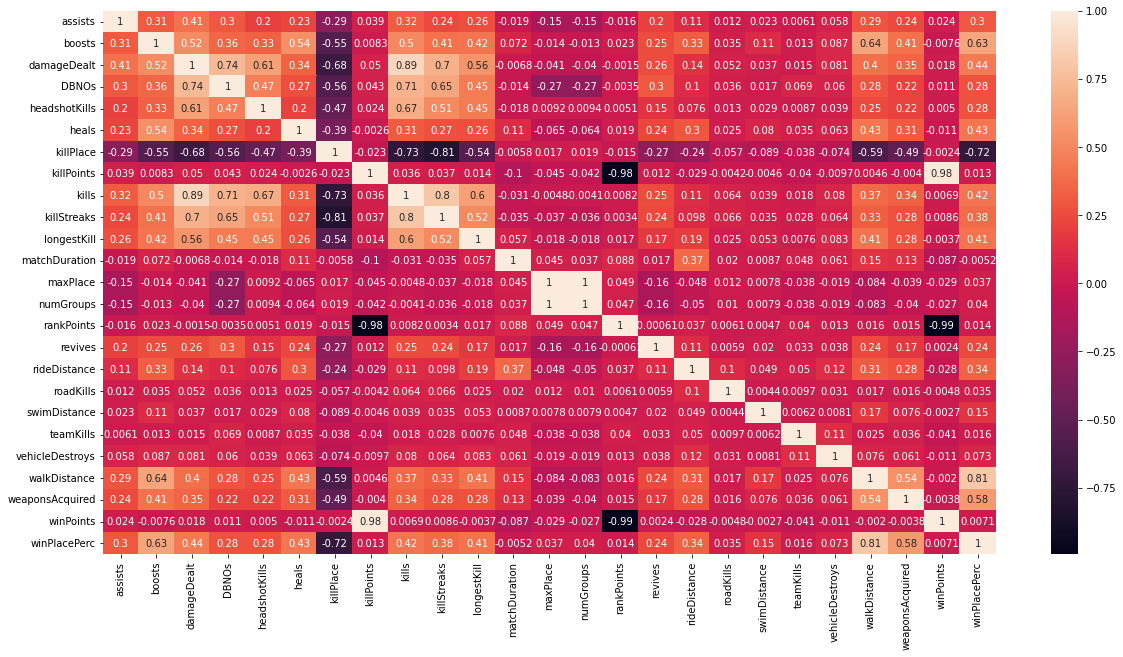

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data=train.corr(), annot=True)
plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [ ]:
# object columns drop
my_train = train.copy()
my_train = my_train.drop(columns=['Id', 'groupId', 'matchId', 'matchType'], axis=1)
my_train.head(2)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.000,0,0,0,60,1241,0,0,...,0,0.000,0,0.000,0,0,244.800,1,1466,0.444
1,0,0,91.470,0,0,0,57,0,0,0,...,0,0.004,0,11.040,0,0,1434.000,5,0,0.640


In [ ]:
my_test = test.copy()
my_test = my_test.drop(columns=['Id', 'groupId', 'matchId', 'matchType'], axis=1)
my_test.head(2)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,0,51.460,0,0,0,73,0,0,0,...,1500,0,0.000,0,0.000,0,0,588.000,1,0
1,0,4,179.100,0,0,2,11,0,2,1,...,1503,2,4669.000,0,0.000,0,0,2017.000,6,0


## Machine Learning
- 기준을 잡기 위해 우선 모델링

In [ ]:
my_train.winPlacePerc.describe()

count   4446965.000
mean          0.473
std           0.307
min           0.000
25%           0.200
50%           0.458
75%           0.741
max           1.000
Name: winPlacePerc, dtype: float64

In [ ]:
X_test = my_test

In [ ]:
# X_train, y_train DataFrame 생성
X_train = my_train.drop(columns='winPlacePerc', axis=1)
y_train = my_train['winPlacePerc']
y_train = pd.DataFrame(data=y_train)

In [ ]:
X_train.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints'],
      dtype='object')

In [ ]:
# 우선 모델링하기 위해 이상치 제거 안한 후 feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled= scaler.fit_transform(X_train)
y_scaled = scaler.fit_transform(y_train)
X_scaled = pd.DataFrame(data=X_scaled, columns = X_train.columns)
y_scaled = pd.DataFrame(data=y_scaled, columns = y_train.columns)

In [ ]:
# test data feature scaling
X_scaled2 = scaler.fit_transform(X_test)
X_scaled2 = pd.DataFrame(data=X_scaled2, columns = X_test.columns)

In [ ]:
X_train = X_scaled
y_train = y_scaled
X_test = X_scaled2

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(3112875, 24) (1334090, 24) (3112875, 1) (1334090, 1)


In [ ]:
# 사용할 모델 및 평가 지표 라이브러리 세팅 -> Regression model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
# LinearRegression

model_lr = LinearRegression().fit(X_train, y_train)
pred = model_lr.predict(X_val)
mae = mean_absolute_error(pred, y_val)
mse = mean_squared_error(pred, y_val)
print('LinearRegression MAE : %4f' %mae)
print('LinearRegression MSE : %4f' %mse)

LinearRegression MAE : 0.301321
LinearRegression MSE : 0.169435


In [ ]:
# Lasso

model_ls = Lasso().fit(X_train, y_train)
pred2 = model_ls.predict(X_val)
mae = mean_absolute_error(pred2, y_val)
mse = mean_squared_error(pred2, y_val)
print('Lasso MAE : %4f' %mae)
print('Lasso MSE : %4f' %mse)

Lasso MAE : 0.870954
Lasso MSE : 0.999079


In [ ]:
# Ridge

model_rg = Ridge().fit(X_train, y_train)
pred3 = model_rg.predict(X_val)
mae = mean_absolute_error(pred3, y_val)
mse = mean_squared_error(pred3, y_val)
print('Ridge MAE : %4f' %mae)
print('Ridge MSE : %4f' %mse)

Ridge MAE : 0.301321
Ridge MSE : 0.169435


In [ ]:
# XGBRegressor

model_xgb = XGBRegressor().fit(X_train, y_train)
pred4 = model_xgb.predict(X_val)
mae = mean_absolute_error(pred4, y_val)
mse = mean_squared_error(pred4, y_val)
print('XGBRegressor MAE : %4f' %mae)
print('XGBRegressor MSE : %4f' %mse)

[08:08:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor MAE : 0.225756
XGBRegressor MSE : 0.101021


In [ ]:
# LGBMRegressor

model_lgb = LGBMRegressor().fit(X_train, y_train)
pred5 = model_lgb.predict(X_val)
mae = mean_absolute_error(pred5, y_val)
mse = mean_squared_error(pred5, y_val)
print('LGBMRegressor MAE : %4f' %mae)
print('LGBMRegressor MSE : %4f' %mse)

LGBMRegressor MAE : 0.196201
LGBMRegressor MSE : 0.075544


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### matchType별 모델링

In [ ]:
train.matchType.unique()
# fpp : 1인칭, tpp : 3인칭
print(train.shape)
print(train.matchType.value_counts().head(6).sum())
# 전체 데이터에서 99%를 차지
4411699/4446966

(4446965, 29)
4411698


0.9920694244120598

In [ ]:
df_sqd = train.loc[train.matchType == 'squad', :]
df_sqd

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0,0.000,0,0.000,0,0,799.900,4,0,0.370
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0,0.000,0,0.000,0,0,65.670,1,0,0.214
40,ffd9e56f13438e,8df2112760f9e2,3f8b160eeee685,0,1,61.900,1,0,1,31,...,0,529.100,0,0.000,0,0,327.300,2,0,0.320
55,d79cdeb0ac6eb5,82ff744317632e,6c79fb59bd74c2,2,4,560.800,5,2,9,4,...,0,0.000,0,0.000,0,0,2190.000,7,1534,0.640
71,83d0b9e08b6e72,1246493aa7619b,55a60d2026f67e,0,3,408.000,2,0,0,5,...,0,0.000,0,226.000,0,0,2135.000,5,1471,0.767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446930,ff4e3cc3929d0c,0509b571643619,226c86599ae538,0,0,230.400,3,0,0,22,...,0,0.000,0,0.000,0,0,207.100,1,0,0.077
4446931,e059d95e0827e2,7b22962b0b7967,909e0493eb3c9d,1,1,30.410,0,0,1,12,...,2,149.300,0,0.000,0,0,2967.000,5,0,0.962
4446933,2a37de9b087929,37351320f6c9c9,67bfa56a22e2ca,0,0,126.500,1,0,0,37,...,0,0.000,0,0.000,0,0,93.350,2,1491,0.107
4446941,18e04b3b452a1a,8de4310ab2d2ae,054bfeb4d51fc4,0,0,62.350,0,0,0,79,...,0,0.000,0,0.000,0,0,65.210,2,0,0.160


In [ ]:
df_sqd.corr().iloc[-1:, :12]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration
winPlacePerc,0.347,0.629,0.419,0.324,0.252,0.428,-0.701,0.017,0.400,0.356,0.383,-0.013


In [ ]:
df_sqd.corr().iloc[-1:, 13:]
# WinPlacePerc와 상관계수가 작은 columns : killPoints, matchDuration, numGroups, rankPoints, roadKills, teamKills, vehicleDestroys, winPoints

,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
winPlacePerc,0.015,0.019,0.275,0.374,0.030,0.140,0.012,0.090,0.808,0.577,0.007,1.000


In [ ]:
df_sqd2 = df_sqd.drop(columns=['killPoints', 'matchDuration', 'numGroups', 'rankPoints', 'roadKills', 'teamKills', 'vehicleDestroys', 'winPoints', 'maxPlace'], axis=1)

In [ ]:
df_sqd2.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPlacePerc
assists,1.000,0.351,0.402,0.281,0.194,0.230,-0.330,0.323,0.258,0.270,0.202,0.133,0.021,0.312,0.219,0.347
boosts,0.351,1.000,0.500,0.407,0.306,0.528,-0.545,0.483,0.398,0.395,0.282,0.366,0.093,0.626,0.428,0.629
damageDealt,0.402,0.500,1.000,0.866,0.610,0.299,-0.668,0.873,0.711,0.571,0.259,0.159,0.031,0.379,0.284,0.419
DBNOs,0.281,0.407,0.866,1.000,0.590,0.250,-0.648,0.855,0.724,0.532,0.255,0.119,0.019,0.290,0.230,0.324
headshotKills,0.194,0.306,0.610,0.590,1.000,0.166,-0.449,0.666,0.516,0.466,0.156,0.088,0.025,0.233,0.162,0.252
heals,0.230,0.528,0.299,0.250,0.166,1.000,-0.376,0.278,0.245,0.232,0.242,0.333,0.074,0.427,0.317,0.428
killPlace,-0.330,-0.545,-0.668,-0.648,-0.449,-0.376,1.000,-0.738,-0.807,-0.520,-0.294,-0.260,-0.082,-0.588,-0.480,-0.701
kills,0.323,0.483,0.873,0.855,0.666,0.278,-0.738,1.000,0.832,0.609,0.266,0.130,0.033,0.360,0.266,0.400
killStreaks,0.258,0.398,0.711,0.724,0.516,0.245,-0.807,0.832,1.000,0.507,0.235,0.111,0.029,0.312,0.251,0.356
longestKill,0.270,0.395,0.571,0.532,0.466,0.232,-0.520,0.609,0.507,1.000,0.171,0.201,0.045,0.376,0.247,0.383


In [ ]:
df_sqd2.shape
df_sqd2.loc[df_sqd2.winPlacePerc == 1, :]
# 한 경기 당 평균 26.8개의 squad팀 참여
626526/23344

26.83884509938314

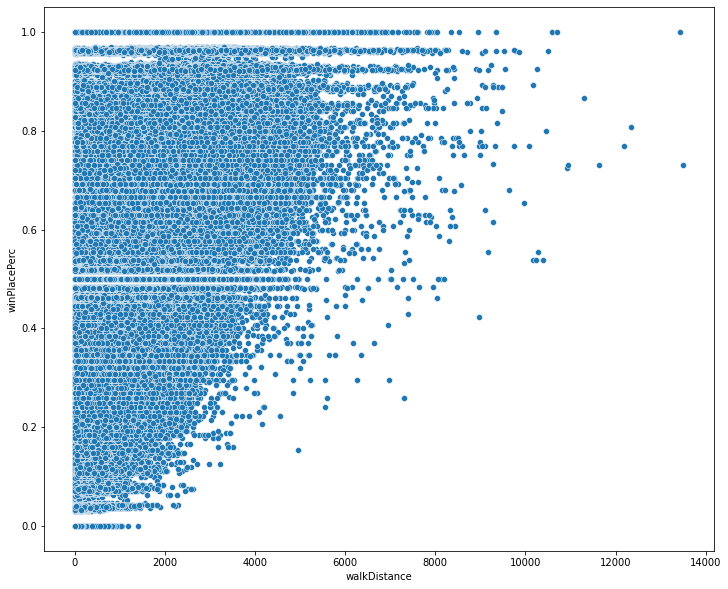

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df_sqd2, x='walkDistance', y='winPlacePerc')
plt.show()

In [ ]:
train.matchType.value_counts().head(6).index

Index(['squad-fpp', 'duo-fpp', 'squad', 'solo-fpp', 'duo', 'solo'], dtype='object')

In [ ]:
# train.matchType in train.matchType.value_counts().head(6).index